<a href="https://colab.research.google.com/github/ghosesuvendu/dataScience/blob/main/Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['TSLA.csv']))

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
data = data[["Date", "Close"]] 
data.head()
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format="True")
data.head()
data = data.rename(columns={"Date":"ds", "Close":"y"})


KeyError: ignored

In [ ]:
data.head()
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
predict = model.make_future_dataframe(periods=365)

In [ ]:
predict

,ds
0,2010-06-29
1,2010-06-30
2,2010-07-01
3,2010-07-02
4,2010-07-06
...,...
2776,2021-01-29
2777,2021-01-30
2778,2021-01-31
2779,2021-02-01


In [ ]:
forcast = model.predict(predict)

In [ ]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,21.283990,-22.199747,72.577713,21.283990,21.283990,3.954272,3.954272,3.954272,-0.572483,-0.572483,-0.572483,4.526756,4.526756,4.526756,0.0,0.0,0.0,25.238263
1,2010-06-30,21.298203,-23.987255,71.935319,21.298203,21.298203,3.007126,3.007126,3.007126,-0.943535,-0.943535,-0.943535,3.950662,3.950662,3.950662,0.0,0.0,0.0,24.305329
2,2010-07-01,21.312415,-20.515189,71.541822,21.312415,21.312415,3.048110,3.048110,3.048110,-0.285720,-0.285720,-0.285720,3.333830,3.333830,3.333830,0.0,0.0,0.0,24.360524
3,2010-07-02,21.326627,-23.682638,68.160655,21.326627,21.326627,1.832065,1.832065,1.832065,-0.858049,-0.858049,-0.858049,2.690114,2.690114,2.690114,0.0,0.0,0.0,23.158692
4,2010-07-06,21.383475,-20.918913,69.613666,21.383475,21.383475,-0.447532,-0.447532,-0.447532,-0.572483,-0.572483,-0.572483,0.124951,0.124951,0.124951,0.0,0.0,0.0,20.935943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,2021-01-29,294.578921,246.050265,368.340111,252.071295,334.714007,15.960577,15.960577,15.960577,-0.858049,-0.858049,-0.858049,16.818627,16.818627,16.818627,0.0,0.0,0.0,310.539498
2777,2021-01-30,294.561051,247.026083,372.276926,251.852701,334.817944,16.500928,16.500928,16.500928,1.251017,1.251017,1.251017,15.249911,15.249911,15.249911,0.0,0.0,0.0,311.061978
2778,2021-01-31,294.543180,247.354751,376.540156,251.647441,334.920404,14.829667,14.829667,14.829667,1.251017,1.251017,1.251017,13.578650,13.578650,13.578650,0.0,0.0,0.0,309.372847
2779,2021-02-01,294.525310,246.436871,372.169007,251.378441,335.024641,11.986960,11.986960,11.986960,0.157755,0.157755,0.157755,11.829206,11.829206,11.829206,0.0,0.0,0.0,306.512270


In [ ]:
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2776,2021-01-29,310.539498,246.050265,368.340111
2777,2021-01-30,311.061978,247.026083,372.276926
2778,2021-01-31,309.372847,247.354751,376.540156
2779,2021-02-01,306.512270,246.436871,372.169007
2780,2021-02-02,303.962200,236.886519,365.569005


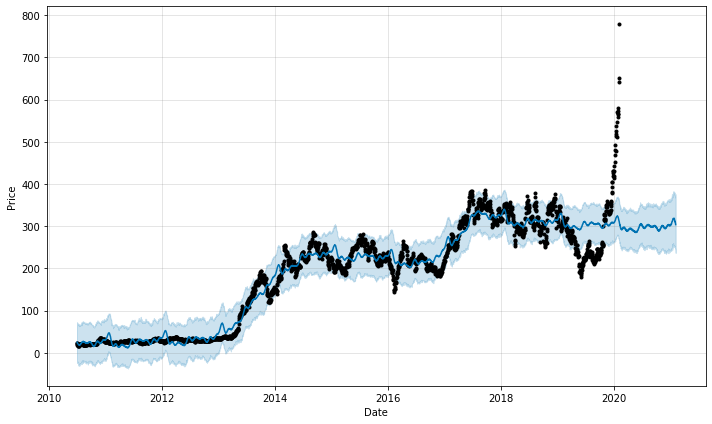

In [ ]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

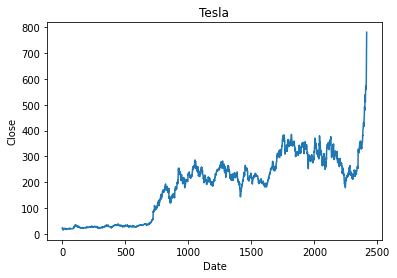

In [ ]:
close = data['y']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()